<a href="https://colab.research.google.com/github/parthasarathydNU/gen-ai-coursework/blob/main/advanced-llms/Advanced_LLMs_INFO_7374_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (50 points)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn as nn
from torch.nn import functional as F

## Problem 1 (20 points)

Optimize the following loss:
$L = (leaky\_relu(w1 * x1 + w2 * x2) - 5) ^ 2$

This represents a single neuron with 2 inputs (x1 and x2) with tunable parameters (w1 and w2). The neuron has leaky relu activation function defined below. The output should be equal to 5. We are measuring the loss using the L2 loss.

> L2 loss, also known as mean squared error (MSE), is a common loss function used in neural networks. It measures the average squared difference between the predicted output and the target output.

>Mathematically L2 Loss is defined as follows:

> ```
L2 loss = (1/n) * Σ(predicted output - target output)^2
```

$\text{LeakyReLU}(x) = \begin{cases}
x, & \text{if } x > 0 \\
0.01 * x, & \text{otherwise}
\end{cases}$

First, let's quickly review the ReLU function:

> ReLU
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)
ReLU(x)=max(0,x)

ReLU sets all negative values to zero and keeps positive values unchanged. This simplicity makes it computationally efficient and reduces the likelihood of vanishing gradients during training. However, it has a downside known as the "dying ReLU" problem. Since the gradient of negative inputs is zero, any neuron that outputs a negative value has zero gradient and thus does not learn during backpropagation, effectively "dying."

The Leaky ReLU (Rectified Linear Unit) function is a variant of the ReLU activation function used in neural networks. The "leaky" aspect refers to how this function deals with negative input values, which addresses one of the major issues in the original ReLU function.

Hints:
1. Since leaky relu is a piecewise function (is calculated different depending on the value of x), the derivative calculation will also be calculated differently depending on the value of x
2. Consider that:

$sum = w1 * x1 + w2 * x2$

$output = leaky\_relu(sum)$

$L = (output - 5) ^ 2$

How can we use the chain rule to $\frac{\delta L}{\delta w1}$ and $\frac{\delta L}{\delta w2}$?


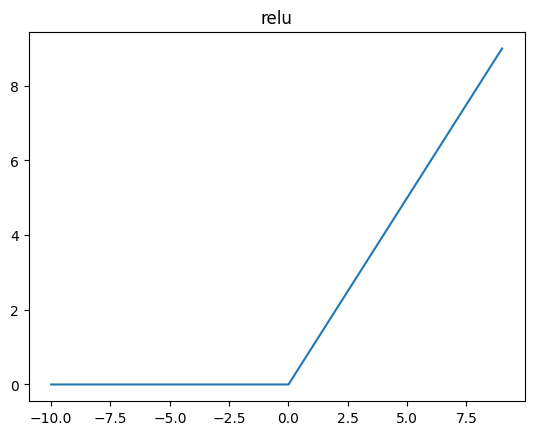

In [3]:
# Demonstrating the reul function

def relu(x):
    if x > 0:
        return x
    else:
        return 0

xs = np.arange(-10, 10)

ys = [relu(x) for x in xs]
plt.title('relu')
plt.plot(xs, ys)

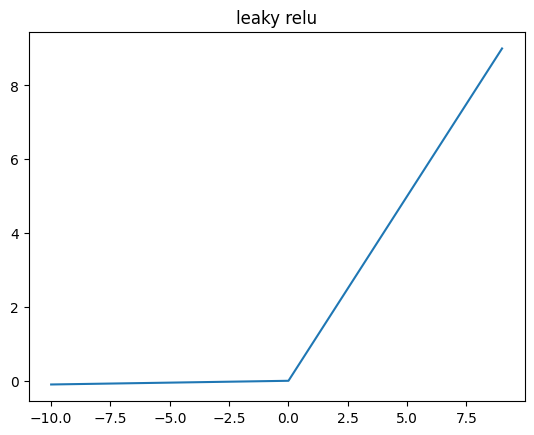

In [4]:
# Demonstrating the leaky relu function

def leaky_relu(x):
    if x > 0:
        return x
    else:
        return 0.01 * x

xs = np.arange(-10, 10)

ys = [leaky_relu(x) for x in xs]
plt.title('leaky relu')
plt.plot(xs, ys)

### 1a. Backpropagation by hand (10 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

Output has to be 5

𝑠𝑢𝑚=𝑤1∗𝑥1+𝑤2∗𝑥2

𝑜𝑢𝑡𝑝𝑢𝑡=𝑙𝑒𝑎𝑘𝑦_𝑟𝑒𝑙𝑢(𝑠𝑢𝑚)

𝐿=(𝑜𝑢𝑡𝑝𝑢𝑡−5)2


In [5]:
# initialization
# Output has to be 5

x1 = 5 # data
x2 = 6

w1 = 7 # model params
w2 = 8

# Learning rate
lr = 0.01

# FORWARD PASS

# weighted sum
# sum = w1 * x1 + w2 * x2

# activation value
# activation = leaky_relu(sum)

# loss
# loss = (activation - 5) ** 2

# BACKWARD PASS Using chain rule

# Calculate loss with respect to activation
# d_L/d_activation = 2 * (activation - 5)

# Gradient of activation with respect to sum
# d_activation/d_sum = 1 if activation > 0 else 0.01
# since Leaky ReLU is just sum for non-negative input

# Gradient of sum w.r.t weights
# Sum =  w1 * x1 + w2 * x2

# d_sum/d_w1 = x1 and d_sum/d_w2 = x2

# Combining using chain rule
# For w1
# d_loss/d_w1 = (d_loss/d_activation) * (d_activation/d_sum) * (d_sum/d_w1)

# For w2
# d_loss/d_w2 = (d_loss/d_activation) * (d_activation/d_sum) * (d_sum/d_w2)

loss_over_iteration = []


for i in range(250):
    # implement here

    # FORWARD PASS
    # weighted sum
    sum = w1 * x1 + w2 * x2

    # activation value
    activation = leaky_relu(sum)

    # loss
    loss = (activation - 5) ** 2

    if (i < 190 and i % 10 == 0) or i >= 190:
      print(f"Iteration {i}")
      print(f"w1: {w1}")
      print(f"w2: {w2}")
      print(f"Activation: {leaky_relu(x1 * w1 + x2 * w2)}")
      print(f"loss: {loss}")
      print()

    loss_over_iteration.append(loss)
    if(loss < 0.001):
        break

    # BACKWARD PASS Using chain rule

    d_loss_d_activation = 2 * (activation - 5)
    d_activation_d_sum = 1 if activation > 0 else 0.01
    d_sum_d_w1 = x1
    d_sum_d_w2 = x2

    # Chain rule
    d_loss_d_w1 = d_loss_d_activation * d_activation_d_sum * d_sum_d_w1
    d_loss_d_w2 = d_loss_d_activation * d_activation_d_sum * d_sum_d_w2

    # Updating weights
    w1 = w1 - lr * d_loss_d_w1
    w2 = w2 - lr * d_loss_d_w2




Iteration 0
w1: 7
w2: 8
Activation: 83
loss: 6084

Iteration 10
w1: -0.7539280876650605
w2: -1.3047137051980724
Activation: -0.11597922669513736
loss: 26.173243447976176

Iteration 20
w1: -0.7027963729884661
w2: -1.2433556475861594
Activation: -0.10974115750459287
loss: 26.10945469669638

Iteration 30
w1: -0.6517270047679166
w2: -1.1820724057215
Activation: -0.10351069458168582
loss: 26.04582140970964

Iteration 40
w1: -0.6007199069824806
w2: -1.1208638883789765
Activation: -0.09728782865186261
loss: 25.98234320812242

Iteration 50
w1: -0.5497750037039209
w2: -1.0597300044447049
Activation: -0.09107255045187834
loss: 25.919019713964595

Iteration 60
w1: -0.49889221909658243
w2: -0.9986706629158989
Activation: -0.08486485072978306
loss: 25.85585055018722

Iteration 70
w1: -0.44807147741727843
w2: -0.9376857729007342
Activation: -0.07866472024490798
loss: 25.79283534066029

Iteration 80
w1: -0.3973127030151783
w2: -0.8767752436182142
Activation: -0.07247214976785177
loss: 25.729973710170

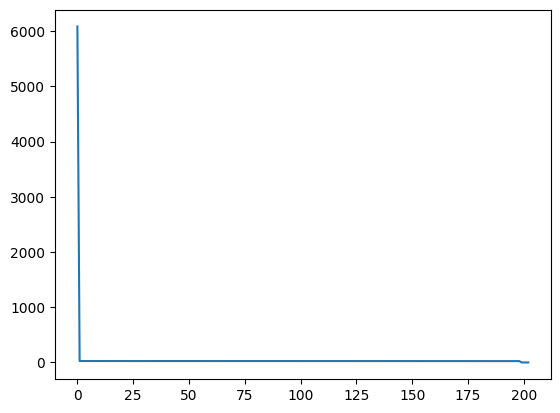

In [6]:
# Line chart to visualize loss_over_iterations
import matplotlib.pyplot as plt
plt.plot(loss_over_iteration)

### Insights form above back propogation

Here we notice something weird where the loss value stays >= to 24 untill the 198th iteration and then suddenly drops to <1 over a coupls of iterations. What could be the reason for this?

Observing the loss value remaining high until a certain number of iterations and then suddenly dropping significantly can be indicative of several potential issues or characteristics in the training process. Here are some possible reasons and considerations:

### 1. **Learning Rate Issues**
   - **Too High**: Initially, if the learning rate is too high, the updates might be too large, causing the model to overshoot the optimal weights repeatedly. This can manifest as a high loss that does not improve until adjustments bring the weights closer to optimal values, sometimes accidentally.
   - **Too Low**: Conversely, if the learning rate is too low, the model might take a very long time to make significant progress, appearing stuck until enough iterations accumulate to make noticeable changes.

### 2. **Initialization of Weights**
   - Weights that are not optimally initialized may lead to poor convergence during the initial training phase. If weights suddenly adjust into a more effective configuration after many iterations, we might see a sharp drop in loss.

### 3. **Activation Functions**
   - Using activation functions like Leaky ReLU can prevent neurons from dying (which could keep the loss high if many neurons are inactive), but they might also initially contribute to slower or uneven learning processes.

### 4. **Data Issues**
   - **Input Scaling**: If the input data is not properly scaled or normalized, the early stages of training can be inefficient, leading to high loss values. Proper scaling or normalization can sometimes take effect in various ways, potentially impacting training dynamics partway through.
   - **Batch Effects**: If we use mini-batches, the composition of these batches can greatly affect training. Perhaps certain batches that are more representative or easier for the model to learn from only come later in the training process.

### 5. **Algorithmic Quirks**
   - **Adaptive Learning Rate Adjustments**: If we’re using adaptive learning rate algorithms like Adam, the learning rates are adjusted over time, which could suddenly improve learning efficiency after many iterations.
   - **Numerical Stability**: Sometimes, numerical issues (like underflow or overflow) can prevent effective learning until they are resolved or circumvented, either by changes in the algorithm or by fluctuations in data or weights.

### 6. **Regularization Effects**
   - If regularization techniques (like dropout or L2 regularization) are in play, they might affect the training dynamics in complex ways, potentially causing delayed effective learning.

### Diagnostics and Solutions
To diagnose and address this, consider the following steps:
- **Experiment with Learning Rates**: Try adjusting the learning rate. If it’s too high or too low, modifying it might yield more consistent improvement.
- **Check Weight Initialization**: Experiment with different methods of weight initialization.
- **Analyze Data Batches**: Look into the distribution of the data batches to ensure they are uniformly representative of the whole dataset.
- **Monitor Gradient Values**: It might be helpful to log and examine the gradients. If they are vanishing or exploding, this could lead to the issues we’re seeing.
- **Adjust Batch Size**: Increasing or decreasing the batch size can sometimes help in achieving more stable and consistent learning.

This analysis should help us understand the sudden drop in the loss and guide how to adjust the model's training process for better and more stable performance.

### 1b. Reimplement 1a using torch. (5 points)

Do not use `torch.optim`

#### Notes regarding pytorch

**Why do we use . after numbers ?** :

In PyTorch, when you see values entered with a dot, such as 3. or 4., it is a shorthand to specify that the number should be treated as a floating-point number (float) rather than an integer. This is crucial in PyTorch for several reasons:

- **Data Type Specification**: Using a dot (`.`) specifies that the number is a floating-point number (float), not an integer.
  
- **Consistency in Data Types**:
  - Ensures that all tensors in computations have compatible data types, which is critical for performing arithmetic operations without type mismatch errors.
  
- **Automatic Differentiation Compatibility**:
  - Required for gradient computations in PyTorch, as gradients are typically fractional and need float types to preserve precision.
  
- **GPU Computation Efficiency**:
  - Floating-point numbers are optimized for GPU computations, which are extensively used in neural network training for performance acceleration.
  
- **Practical Use in Neural Networks**:
  - Most tensor operations in neural networks, especially those involving weights and activations, necessitate floating-point precision to function correctly and efficiently.

  This notation is a straightforward method to ensure tensors are created as floats, facilitating their use in various neural network computations in PyTorch.

**What is F.leaky_relu ?**

In the context of PyTorch, `F` usually refers to `torch.nn.functional`, which is a module within PyTorch. This module contains a wide range of functions that are used in building neural networks, particularly for operations like activations, loss calculations, and more complex functions for layer operations that do not require maintaining state (i.e., weights).

Here's what `F` typically represents in your code:

- **Namespace for Functional API**: `F` serves as a namespace for accessing these functions. It helps keep your code organized by clearly differentiating between stateful layers from `torch.nn` module (like `nn.Linear`, `nn.Conv2d` which hold weights) and stateless functions from `torch.nn.functional` (like `F.relu`, `F.leaky_relu` which do not hold any state).

- **Usage in Your Code**: When you see `F.leaky_relu`, it refers to the Leaky ReLU activation function provided by the `torch.nn.functional` module. This function is used directly without needing to instantiate an object, making it a quick and efficient way to apply activations or other operations in a stateless manner.

  ```python
  import torch
  from torch import nn as nn
  from torch.nn import functional as F
  ```

### Why Use `torch.nn.functional`?

- **Flexibility**: Functions in `F` can be used directly on tensors, providing a flexible way to apply operations without binding them to module instances. This is particularly useful in custom layers or forward functions where you may want to mix and match different operations without the overhead of managing modules.

- **Convenience**: For one-off operations that don’t require learning parameters, using `F` can be more concise and clearer. It avoids the overhead of creating an instance of a module when you simply need to apply a function.

  Here's an example of how you might import and use this module:

  ```python
  import torch.nn.functional as F

  # Example usage of the functional API for an activation function
  tensor = torch.tensor([1.0, -1.0, 0.0], requires_grad=True)
  activated_tensor = F.leaky_relu(tensor)
  ```

  This approach is widely used in PyTorch scripts for clarity and efficiency, especially in complex models where direct function applications can reduce clutter and enhance readability.

In [7]:
x1 = torch.tensor(3., requires_grad=False) # data
x2 = torch.tensor(4., requires_grad=False)

# Weights
# The weights have requires_grad=True which tells PyTorch that it needs to
# track all operations on them to perform automatic differentiation.
w1 = torch.tensor(5., requires_grad=True) # model params
w2 = torch.tensor(6., requires_grad=True)


lr = 0.01

activation = F.leaky_relu(sum)

# The training loop will perform the forward pass, compute the loss,
# and backpropagate to update the weights.
for i in range(100):

    # Forward pass
    sum = x1 * w1 + x2 * w2
    target = torch.tensor(5., requires_grad=False)
    loss = torch.nn.functional.mse_loss(activation, target)

    # Backward Pass: loss.backward() calculates the gradients of the loss with
    # respect to all parameters (w1, w2) that have requires_grad=True.
    loss.backward()

    # Update Weights: Weights are updated using a simple gradient descent rule.

    # No Gradient Tracking During Updates: torch.no_grad()
    # temporarily sets all the requires_grad flags to false.
    with torch.no_grad():
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad

        # It’s crucial to zero the gradients after each update because PyTorch
        # accumulates gradients on subsequent backward passes.
        w1.grad.zero_()
        w2.grad.zero_()


    print(f"Iteration {i}")
    print(f"loss: {loss.item()}")

    if loss.item() < 0.001:
        break


# After training, you calculate the prediction using the learned weights.
# The .detach() method is used to get the tensor without gradient tracking,
# and .item() converts a one-element tensor to a scalar.
prediction = (F.leaky_relu(x1*w1 + x2*w2)).detach().item()

print(f"prediction: ", prediction)

Iteration 0
loss: 1156.0
Iteration 1
loss: 289.0
Iteration 2
loss: 72.25
Iteration 3
loss: 18.0625
Iteration 4
loss: 4.515625
Iteration 5
loss: 1.12890625
Iteration 6
loss: 0.2822265625
Iteration 7
loss: 0.070556640625
Iteration 8
loss: 0.01763916015625
Iteration 9
loss: 0.0044097900390625
Iteration 10
loss: 0.001102447509765625
Iteration 11
loss: 0.00027561187744140625
prediction:  5.00830078125


### Insights from above pytorch implementation

**The gradient descent converged pretty quickly as compared to doing it by hand. Why so ?**

The difference in the speed of convergence between manually implemented gradient descent and the PyTorch implementation can be attributed to several factors. Each of these plays a crucial role in optimizing the training process more efficiently when using PyTorch. Here's a detailed breakdown of why PyTorch might be performing better:

### 1. **Precision in Gradient Calculation**
- **Manual Calculation**: When calculating gradients by hand, the precision of the derivative, especially with conditional derivatives (like those needed for Leaky ReLU), can be prone to small errors or oversimplifications. For example, your manual implementation might not perfectly calculate the gradient when the activation is exactly zero.
- **PyTorch Implementation**: PyTorch uses highly optimized numerical methods and hardware acceleration (like GPU computation) to calculate gradients more accurately and efficiently. This ensures that every update step is as precise as possible.

### 2. **Efficiency in Vectorized Operations**
- **Manual Vectorization**: Manual implementations may not fully leverage vectorized operations, which are crucial for performance in deep learning. Efficient use of memory and computation resources can significantly impact the speed of operations.
- **PyTorch Vectorization**: PyTorch inherently uses vectorized operations under the hood, speeding up calculations over batches of data or across multiple dimensions of data simultaneously.

### 3. **Optimized Backpropagation Mechanics**
- **Backpropagation Algorithm**: In manual implementations, the forward and backward pass might not be optimally aligned, and updating each weight can introduce slight inefficiencies.
- **PyTorch's Autograd**: PyTorch's automatic differentiation engine (`autograd`) optimizes the computation of gradients by creating an efficient computation graph. It records exactly where computations can be combined and optimized, reducing the computational load.

### 4. **Accumulation of Gradients**
- **Manual Zeroing**: Manually zeroing gradients might be skipped or not handled correctly, leading to incorrect gradient calculations across iterations.
- **Automatic Handling in PyTorch**: PyTorch automatically handles the accumulation of gradients. When you call `.zero_()` on gradients, it ensures that no residual gradient from a previous iteration affects your current update.

### 5. **Adaptive Learning and Precision**
- **Learning Rate Management**: Manual updates might not adapt the learning rate based on the training dynamics, which can lead to slower convergence if the rate is not ideal.
- **Precision and Updates**: PyTorch can manage smaller updates more precisely due to better handling of floating-point computations, which can lead to faster convergence especially in the fine-tuning phase of training.

### 6. **Implementation Errors and Approximations**
- **Errors in Manual Code**: There's a higher risk of small errors or approximations in manual implementations, which can significantly affect the training dynamics and convergence rate.
- **Optimized Libraries**: PyTorch uses optimized and tested components that reduce the likelihood of such errors.

### Conclusion
The combined effect of these factors results in PyTorch often converging much faster and more reliably than manual implementations, especially for complex functions and models. This demonstrates the advantage of using well-optimized libraries in machine learning, which not only speed up the development process but also improve performance due to underlying optimizations that might be non-trivial to implement manually.


### 1c. Implement a 2 layer neural network. (5 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the leaky relu activation. The second layer should not use an activation function.

Train the model so that it outputs 5. Use an L2 loss as we did in 1a and 1b.

[Pytorch docs on how to use leaky relu]("https://pytorch.org/docs/stable/generated/torch.nn.LeakyReLU.html")

In [14]:
class MLP(nn.Module):
    def __init__(self):
        # implement
        # Init call to the parent class must be made before assignment on the child
        super().__init__()
        # Syntax
        # nn.Linear(input_features, output_features, bias)
        # bias by default is set to true, so there will be a bias term associated

        # Here we are ceating a first layer that takes in 32 features and
        # outputs 8 features.
        self.layer1 = nn.Linear(32, 8)
        # Here we are creating a second layer that takes in 8 features and
        # outputs 1 feature.
        self.layer2 = nn.Linear(8, 1)

    # Here we define the computation that has to happen at every call
    def forward(self, x):
        # implement
        # First layer uses a leaky relu function
        x = F.leaky_relu(self.layer1(x))
        # Second layer does not use an activation function
        x = self.layer2(x)
        return x

# Defining the input
x = torch.randn((4, 32)).float()

# Initializing the NN model
net = MLP()

# Defining the optimizer
# https://pytorch.org/docs/stable/optim.html
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# Refer https://pytorch.org/docs/stable/optim.html#taking-an-optimization-step
for _ in range(100):
    # zero the gradients
    optimizer.zero_grad()
    # forward pass
    prediction = net(x)
    # calculate loss
    loss = F.mse_loss(prediction, torch.full((4, 1), 5.))
    # backward pass
    loss.backward()
    # update weights
    optimizer.step()

prediction = net(x)
print(f"{prediction=}")

prediction=tensor([[5.0000],
        [5.0000],
        [5.0000],
        [5.0000]], grad_fn=<AddmmBackward0>)


## Problem 2 (30 points)

The objective is predict 0.6. This time, we will use an L1 loss, a sigmoid activation function, and 3 inputs instead. Specifically,


$prediction = sigmoid(w1 * x1 + w2 * x2 + w3 * x3)$

$loss = l1(prediction, 0.6)$

where $sigmoid$ and $l1$ is defined as:

$sigmoid(x) = \frac{1}{1+e^{-x}}$

and $l1(prediction, target) = absolute\_value(prediction - target)$

$\text{absolute_value}(x) = \begin{cases}
x, & \text{if } x > 0 \\
-x, & \text{otherwise}
\end{cases}$


Note that the absolute value function is a piece wise function, similar to leaky_relu.

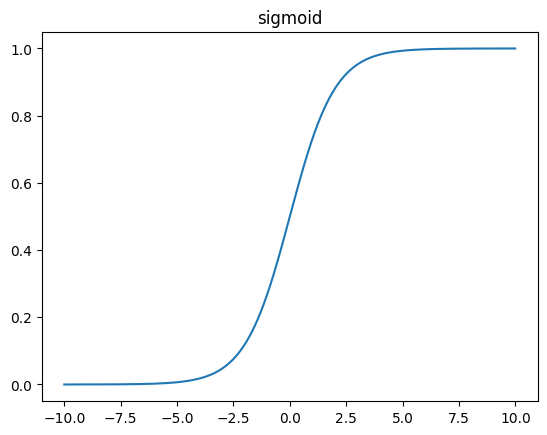

In [16]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

xs = np.arange(-10, 10, 0.01)

ys = [sigmoid(x) for x in xs]
plt.title('sigmoid')
plt.plot(xs, ys)

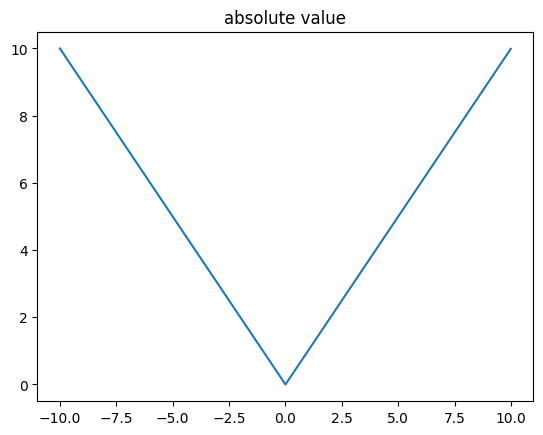

In [17]:
def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

xs = np.arange(-10, 10, 0.01)

ys = [absolute_value(x) for x in xs]
plt.title('absolute value')
plt.plot(xs, ys)

### 2a. Backpropagation by hand (15 points)
Optimize the loss using only python like we did in class. Derive the gradients by hand.

#### Understanding the chain rule here

Understanding the Terms

- Loss Function: The loss function we have described is
𝐿
=
∣
Prediction − 0.6 ∣ , where the absolute value measures the magnitude of the error between the network’s output (Prediction) and the target value (0.6).

- Prediction: This is the output of your neural network, specifically Prediction
= 𝜎 ( 𝑥1 * 𝑤1 + 𝑥2 * 𝑤2 + 𝑥3 * 𝑤3 ), where σ is the sigmoid activation function.

**First part of the chain**

When we calculate the chain rule, the first part of the chain is dL/dPrediction and not dL/dAbsoluteValue because “Absolute_value” is not a variable but rather part of the operation applied within the loss function. The operation defines how the loss is calculated but isn't a variable affecting the derivative directly.

Hence when we calculate the derivative of the first chain, we perform dL/dPrediction.

Since | Prediction - 0.6 | is positive when Prediction is > 0 and negative if Prediction is <= 0, the gradient follows the same.

dLoss/DPrediction = 1 if prediction > 0.6 else -1

**Second part of the chain**

Prediction is the output of the sigmoid function, which is sigmoid of the weighted sum which is often referred to as z.

Prediction = 𝜎(z) . Like the absolute value, we need to here look at the rate of change of 𝜎(z) with respect to z, as z is the variable here. It internally has w1, w2 and w3. Which we will be finding the derivative of in the subsequent steps.

𝜎( z ) = (1 + e ^ -z ) ^ -1

Finding the derivative of this with respect to z is
σ ' ( z ) = σ ( z ) ( 1 − σ ( z ) )

Thus dPrediction/dZ = sigmoid( z ) ( 1 - sigmoid ( z ) ) = prediction ( 1 - prediction )

epoch: 0
prediction: 0.8115326747861805
loss: 0.21153267478618054

epoch: 50
prediction: 0.7979731978355336
loss: 0.19797319783553358

epoch: 100
prediction: 0.7829040347865712
loss: 0.18290403478657125

epoch: 150
prediction: 0.7661557443164418
loss: 0.16615574431644187

epoch: 200
prediction: 0.7475580355129442
loss: 0.14755803551294422

epoch: 250
prediction: 0.7269511296029567
loss: 0.12695112960295674

epoch: 300
prediction: 0.7042022897056351
loss: 0.10420228970563516

epoch: 350
prediction: 0.6792278705378267
loss: 0.07922787053782676

epoch: 400
prediction: 0.6520199305878219
loss: 0.05201993058782195

epoch: 450
prediction: 0.6226743192041801
loss: 0.02267431920418017

Output after training the model
0.6003418283979798


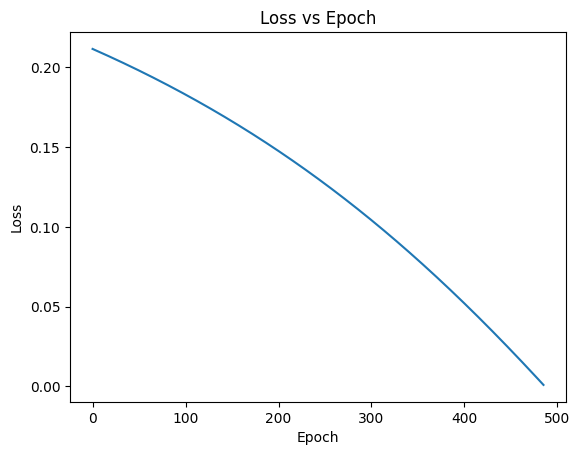

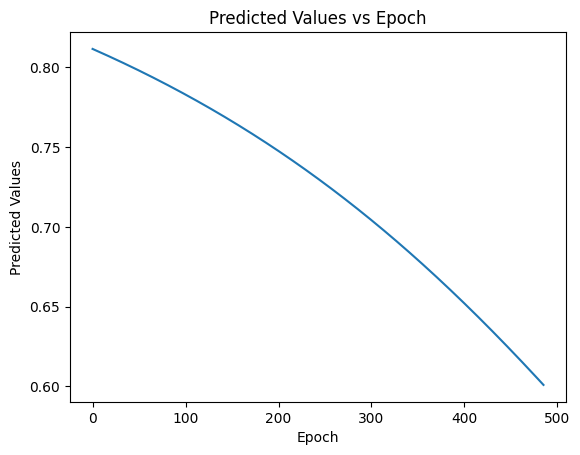

In [27]:
# initialization

x1, x2, x3 = 0.5, 0.6, 0.7 # data
w1, w2, w3 = 0.7, 0.8, 0.9 # model

lr = 0.01

loss_arr = []
predicted_values = []

for i in range(1000):
    # implement here
    # forward pass
    prediction = sigmoid(x1 * w1 + x2 * w2 + x3 * w3)
    # calculate loss
    loss = absolute_value(prediction - 0.6)
    # backward pass
    # Calculating gradients using chain rule

    # Using the chain rule
    # dL/dw = dL/dPrediction * dPrediction/dZ * dZ/dW
    dL_dPrediction = 1 if prediction > 0.6 else -1
    dPrediction_dZ = prediction * (1 - prediction)
    dZ_dW1 = x1
    dZ_dW2 = x2
    dZ_dW3 = x3

    # dLoss_dW1
    dL_dW1 = dL_dPrediction * dPrediction_dZ * dZ_dW1
    # dLoss_dW2
    dL_dW2 = dL_dPrediction * dPrediction_dZ * dZ_dW2
    # dLoss_dW3
    dL_dW3 = dL_dPrediction * dPrediction_dZ * dZ_dW3

    # update weights
    w1 -= dL_dW1 * lr
    w2 -= dL_dW2 * lr
    w3 -= dL_dW3 * lr

    if i % 50 == 0:
        print(f'epoch: {i}')
        print(f'prediction: {prediction}')
        print(f'loss: {loss}')
        print()

    predicted_values.append(prediction)
    loss_arr.append(loss)

    # Stop if loss is below threshold
    if loss < 0.001:
        break

# Printing the output
print("Output after training the model")
print(sigmoid(x1 * w1 + x2 * w2 + x3 * w3))

# Plot graph of loss over epoch
# Add titles to the plots
import matplotlib.pyplot as plt
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_arr)
plt.show()

# Plot graph of predicted values over epoch
plt.title("Predicted Values vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Predicted Values")
plt.plot(predicted_values)
plt.show()

### 2b. Reimplement 2a using torch. (5 points)

Do not use `torch.optim`

In [31]:
# Defining the input
# initialization
x1 = torch.tensor(0.5, requires_grad=False)
x2 = torch.tensor(0.6, requires_grad=False)
x3 = torch.tensor(0.7, requires_grad=False)

# Weights
w1 = torch.tensor(0.7, requires_grad=True)
w2 = torch.tensor(0.8, requires_grad=True)
w3 = torch.tensor(0.9, requires_grad=True)

# Defining the learning rate
lr = 0.01

def absolute_value(x):
    if x < 0:
        return -x
    else:
        return x

# Defining the loss function
# We need to use the absolute function such that it can handle tensors
# The unreduced loss is defined as
# ln​ = ∣ xn​ −yn​ ∣
loss_fn = nn.L1Loss(reduction='none')

# Defining the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))


# We cannot use an optimizer for this task

# Refer https://pytorch.org/docs/stable/optim.html#taking-an-optimization-step
for _ in range(500):
    # forward pass
    prediction = sigmoid(x1 * w1 + x2 * w2 + x3 * w3)
    # calculate loss
    loss = loss_fn(prediction, torch.tensor(0.6, requires_grad=False))

    # Backward Pass: loss.backward() calculates the gradients of the loss with
    # respect to all parameters (w1, w2) that have requires_grad=True.
    loss.backward()

    # Update Weights: Weights are updated using a simple gradient descent rule.

    # No Gradient Tracking During Updates: torch.no_grad()
    # temporarily sets all the requires_grad flags to false.
    with torch.no_grad():
        # update weights
        w1 -= lr * w1.grad
        w2 -= lr * w2.grad
        w3 -= lr * w3.grad

        # Zero the gradients after updating the weights.
        # It’s crucial to zero the gradients after each update because PyTorch
        # accumulates gradients on subsequent backward passes.
        w1.grad.zero_()
        w2.grad.zero_()
        w3.grad.zero_()


    # Breaking the loop if loss is lesser than threshold
    if loss < 0.001:
        break

    # Printing the output across iterations if epoch is a multiple of 10
    if _ % 20 == 0:
        print(f"Loss at epoch {_}: {loss}")
        print(f"{prediction=}")
        print(f"{w1=}, {w2=}, {w3=}")
        print()

prediction = sigmoid(x1 * w1 + x2 * w2 + x3 * w3)
print(f"{prediction=}")

Loss at epoch 0: 0.21153265237808228
prediction=tensor(0.8115, grad_fn=<MulBackward0>)
w1=tensor(0.6992, requires_grad=True), w2=tensor(0.7991, requires_grad=True), w3=tensor(0.8989, requires_grad=True)

Loss at epoch 20: 0.20627939701080322
prediction=tensor(0.8063, grad_fn=<MulBackward0>)
w1=tensor(0.6838, requires_grad=True), w2=tensor(0.7805, requires_grad=True), w3=tensor(0.8773, requires_grad=True)

Loss at epoch 40: 0.20080047845840454
prediction=tensor(0.8008, grad_fn=<MulBackward0>)
w1=tensor(0.6680, requires_grad=True), w2=tensor(0.7616, requires_grad=True), w3=tensor(0.8552, requires_grad=True)

Loss at epoch 60: 0.19508546590805054
prediction=tensor(0.7951, grad_fn=<MulBackward0>)
w1=tensor(0.6518, requires_grad=True), w2=tensor(0.7422, requires_grad=True), w3=tensor(0.8326, requires_grad=True)

Loss at epoch 80: 0.18912357091903687
prediction=tensor(0.7891, grad_fn=<MulBackward0>)
w1=tensor(0.6354, requires_grad=True), w2=tensor(0.7224, requires_grad=True), w3=tensor(0.809

### 2c. Implement a 2 layer neural network. (10 points)

The neural network should be able to take inputs of size [4, 32] (batch size of 4 with 32 features per sample). The first layer should have have an output dimension of 8 and use the sigmoid activation. The second layer should also use a sigmoid activation function.

Train the model so that it outputs 0.6. Use an L2 loss as we did in 1a and 1b.

[PyTorch docs for how to use sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)

In [38]:
# implement here (follow the structure of 1c)
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(32, 8)
        self.fc2 = nn.Linear(8, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = torch.sigmoid(x)
        x = self.fc2(x)
        x = torch.sigmoid(x)
        return x

model = MLP()

# Defining the input
x = torch.randn(4, 32)

# Defining the loss function
loss_fn = nn.MSELoss()

# Defining the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [39]:
# Refer https://pytorch.org/docs/stable/optim.html#taking-an-optimization-step
for _ in range(500):
    # zero the gradients
    optimizer.zero_grad()
    # forward pass
    prediction = model(x)
    # calculate loss
    loss = F.mse_loss(prediction, torch.full((4, 1), 0.6))
    # backward pass
    loss.backward()
    # update weights
    optimizer.step()

    # Printing the output across iterations if epoch is a multiple of 10
    if _ % 20 == 0:
        print(f"Loss at epoch {_}: {loss}")
        print(f"{prediction=}")
        print()

    # Breaking the loop if loss is lesser than threshold
    if loss < 0.001:
        break


prediction = model(x)
print(f"{prediction=}")

Loss at epoch 0: 0.025004563853144646
prediction=tensor([[0.4619],
        [0.4511],
        [0.4344],
        [0.4229]], grad_fn=<SigmoidBackward0>)

Loss at epoch 20: 0.020772255957126617
prediction=tensor([[0.4764],
        [0.4652],
        [0.4483],
        [0.4367]], grad_fn=<SigmoidBackward0>)

Loss at epoch 40: 0.017232883721590042
prediction=tensor([[0.4897],
        [0.4782],
        [0.4611],
        [0.4496]], grad_fn=<SigmoidBackward0>)

Loss at epoch 60: 0.014286709949374199
prediction=tensor([[0.5018],
        [0.4900],
        [0.4728],
        [0.4613]], grad_fn=<SigmoidBackward0>)

Loss at epoch 80: 0.011842768639326096
prediction=tensor([[0.5128],
        [0.5008],
        [0.4835],
        [0.4721]], grad_fn=<SigmoidBackward0>)

Loss at epoch 100: 0.009820487350225449
prediction=tensor([[0.5228],
        [0.5106],
        [0.4933],
        [0.4819]], grad_fn=<SigmoidBackward0>)

Loss at epoch 120: 0.008149921894073486
prediction=tensor([[0.5318],
        [0.5195],
 